<a href="https://colab.research.google.com/github/juancuadrado/DOE_2023/blob/main/Caso_Catalizadores_DCL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerías Básicas para Diseño de Experimentos**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats
!pip install bioinfokit &>/dev/null
from bioinfokit.analys import stat as st
!pip install pingouin &>/dev/null
import pingouin as pg

#  **Tema 4: Diseños Cuadrados Latinos - DCL usando Python: Versión 2**

##  <span style="color:green">**Ejemplo. Se quiere estudiar el efecto de cinco diferentes catalizadores (A, B, C, D y E) sobre el tiempo de reacción de un proceso químico. Cada lote de material sólo permite cinco corridas y cada corrida requiere aproximadamente 1.5 horas, por lo que sólo se pueden realizar cinco corridas diarias. El experimentador decide correr los experimentos con un diseño en cuadro latino para controlar activa mente los lotes y días. Los datos obtenidos son:**</span>

|Lote \ Día|	1:Lunes	|2:Martes	|3:Miercoles	|4:Jueves|  5:viernes|
|:--:|:--:|:--:|:--:|:--:|:--:|
|1:Lote1| A = 8 |	B = 7|	D = 1 |	C = 7 | E = 3 |
|2:Lote2| C = 11|	E = 2|	A = 7 |	D = 3 | B = 8 |
|3:Lote3| B = 4 |	A = 9|  C = 10|	E = 1 | D = 5 |
|4:Lote4| D = 6 |	C = 8|	E = 6 |	B = 6 | A = 10|
|4:Lote5| E = 4 |	D = 2|	B = 3 |	A = 8 | C = 8 |



- **Las hipótesis a probar: Para los tratamientos**
$$H_{01}: \mu_{T_1}=\mu_{T_2}=\mu_{T_3}=\mu_{T_4}$$ $$Vs$$ $$H_{a1}: \mu_{T_i}\neq\mu_{T_j}$$ _Al menos un tratamiento(Catalizador) tiene tiempo de reacción medios  diferentes_

- **Las hipótesis a probar: Para los Bloques**
$$H_{02}: \mu_{B_1}=\mu_{B_2}=\mu_{B_3}=\mu_{B_4}=\mu_{B_4}$$ $$Vs$$ $$H_{a2}: \mu_{B_i}\neq\mu_{B_j}$$  _Al menos un par de bloque (Lote) tiene tiempo de reacción medios diferentes_

- **Las hipótesis a probar: Para los Bloques**
$$H_{03}: \mu_{\gamma_1}=\mu_{\gamma_2}=\mu_{\gamma_3}=\mu_{\gamma_4}=\mu_{\gamma_4}$$ $$Vs$$ $$H_{a2}: \mu_{\gamma_i}\neq\mu_{\gamma_j}$$  _Al menos un par de bloque (Día) tiene tiempo de reacción medios diferentes_


## **4.1 Los Datos del Problema**

In [2]:
## **4.1 Los Datos del Problema**

## **4.1 Los Datos del Problema**
Lote  =  [ "Lote1" ,  "Lote2" ,  "Lote3" ,  "Lote4", "Lote5" ]
Dia  =  [ "Dia1" ,  "Dia2" ,  "Dia3" ,  "Dia4", "Dia5"]
Catalizador = ["A", "B", "D","C","E", "C", "E", "A", "D", "B", "B", "A", "C", "E", "D", "D", "C", "E", "B", "A", "E","D","B", "A", "C"]
Tiempo =[8, 7, 1, 7, 3, 11, 2, 7, 3, 8, 4, 9, 10, 1, 5 ,6, 8, 6, 6, 10, 4, 2, 3, 8,8]

## **4.2 Construyamos el dataFrame de los precios y productos**

In [3]:
## **4.2 Construyamos el dataFrame de los precios y productos**
#DCL = pd.DataFrame({'Conductor':Lote, 'Dia':Dia, 'Catalizador':Catalizador, 'Tiempo':Tiempo})

DCL = pd.DataFrame({'Lote':np.repeat(Lote,5), 'Dia':Dia*5, 'Catalizador':Catalizador, 'Tiempo':Tiempo})
DCL

,Lote,Dia,Catalizador,Tiempo
0,Lote1,Dia1,A,8
1,Lote1,Dia2,B,7
2,Lote1,Dia3,D,1
3,Lote1,Dia4,C,7
4,Lote1,Dia5,E,3
5,Lote2,Dia1,C,11
6,Lote2,Dia2,E,2
7,Lote2,Dia3,A,7
8,Lote2,Dia4,D,3
9,Lote2,Dia5,B,8


In [4]:
DCL.describe()

,Tiempo
count,25.00000
mean,5.88000
std,2.93428
min,1.00000
25%,3.00000
50%,6.00000
75%,8.00000
max,11.00000


In [5]:
DCL.groupby('Catalizador')['Tiempo'].agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
Catalizador,,,,
A,8.4,1.140175,7,10
B,5.6,2.073644,3,8
C,8.8,1.643168,7,11
D,3.4,2.073644,1,6
E,3.2,1.923538,1,6


In [6]:
DCL.groupby('Dia')['Tiempo'].agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
Dia,,,,
Dia1,6.6,2.966479,4,11
Dia2,5.6,3.361547,2,9
Dia3,5.4,3.507136,1,10
Dia4,5.0,2.915476,1,8
Dia5,6.8,2.774887,3,10


In [7]:
DCL.groupby('Lote')['Tiempo'].agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
Lote,,,,
Lote1,5.2,3.033150,1,8
Lote2,6.2,3.701351,2,11
Lote3,5.8,3.701351,1,10
Lote4,7.2,1.788854,6,10
Lote5,5.0,2.828427,2,8


In [8]:
#**c. Contar las observaciones**
DCL["Tiempo"].value_counts()


8     5
7     3
3     3
6     3
1     2
2     2
4     2
10    2
11    1
9     1
5     1
Name: Tiempo, dtype: int64

In [9]:
DCL["Dia"].value_counts()

Dia1    5
Dia2    5
Dia3    5
Dia4    5
Dia5    5
Name: Dia, dtype: int64

In [10]:
DCL["Lote"].value_counts()

Lote1    5
Lote2    5
Lote3    5
Lote4    5
Lote5    5
Name: Lote, dtype: int64

In [11]:
DCL["Catalizador"].value_counts()

A    5
B    5
D    5
C    5
E    5
Name: Catalizador, dtype: int64

In [12]:
DCL[["Catalizador","Tiempo"]].describe()

,Tiempo
count,25.00000
mean,5.88000
std,2.93428
min,1.00000
25%,3.00000
50%,6.00000
75%,8.00000
max,11.00000


In [13]:
DCL[["Dia","Tiempo"]].describe()

,Tiempo
count,25.00000
mean,5.88000
std,2.93428
min,1.00000
25%,3.00000
50%,6.00000
75%,8.00000
max,11.00000


In [14]:
DCL[["Lote","Tiempo"]].describe()

,Tiempo
count,25.00000
mean,5.88000
std,2.93428
min,1.00000
25%,3.00000
50%,6.00000
75%,8.00000
max,11.00000


## **4.5. BoxPlot para DCL - Consumo**

<Axes: title={'center': 'Tiempo vs Catalizador'}, xlabel='Catalizador', ylabel='Tiempo'>

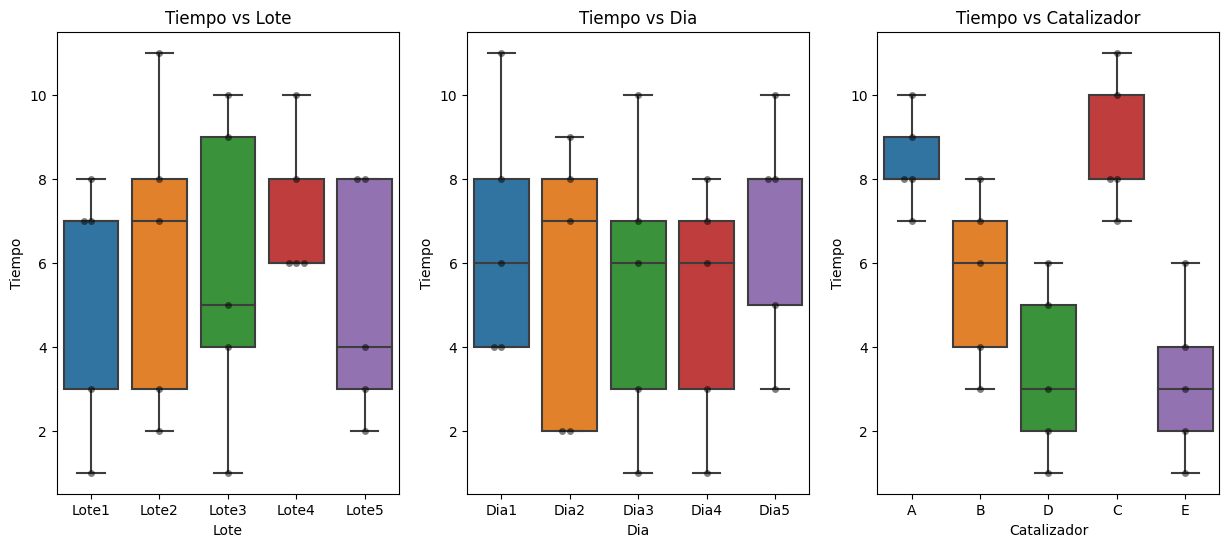

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
axs[0].set_title('Tiempo vs Lote')
sns.boxplot(x="Lote", y="Tiempo", data=DCL, ax=axs[0])
sns.swarmplot(x="Lote", y="Tiempo", data=DCL, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('Tiempo vs Dia')
sns.boxplot(x="Dia", y="Tiempo", data=DCL, ax=axs[1])
sns.swarmplot(x="Dia", y="Tiempo", data=DCL, color='black',
              alpha = 0.5, ax=axs[1])
axs[2].set_title('Tiempo vs Catalizador')
sns.boxplot(x="Catalizador", y="Tiempo", data=DCL, ax=axs[2])
sns.swarmplot(x="Catalizador", y="Tiempo", data=DCL, color='black',
              alpha = 0.5, ax=axs[2])


## **4.6 Diagrama Bivariado no es sposible dado que no hay replicas**

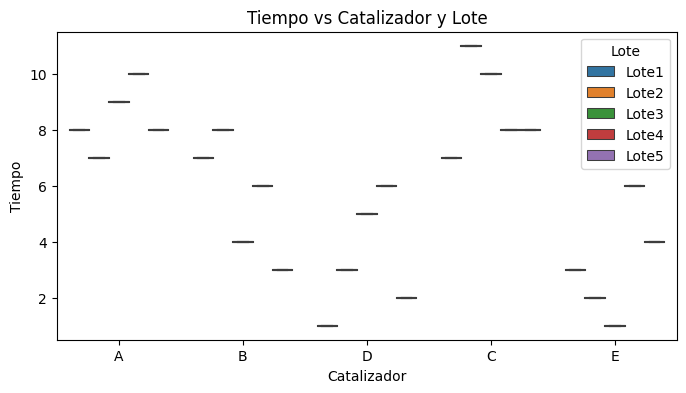

In [16]:
## **4.6 Diagrama Bivariado no es sposible dado que no hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Tiempo vs Catalizador y Lote')
sns.boxplot(x="Catalizador", y="Tiempo", hue='Lote', data=DCL, ax=ax);

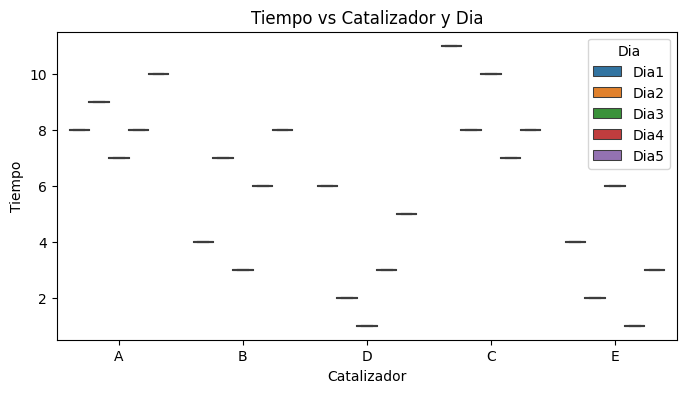

In [17]:
## **4.6 Diagrama Bivariado no es sposible dado que no hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Tiempo vs Catalizador y Dia')
sns.boxplot(x="Catalizador", y="Tiempo", hue='Dia', data=DCL, ax=ax);

## **4.7 Análisis de Varianza Tipo I**

1.   Elemento de la lista
2.   Elemento de la lista



In [18]:
# **4.7 Análisis de Varianza Tipo II**
modeloDCL = ols("Tiempo ~ Catalizador + Lote + Dia", data = DCL).fit()
anova_result2 = sm.stats.anova_lm(modeloDCL, typ=1)
print (anova_result2)

               df  sum_sq    mean_sq          F    PR(>F)
Catalizador   4.0  141.44  35.360000  11.309168  0.000488
Lote          4.0   15.44   3.860000   1.234542  0.347618
Dia           4.0   12.24   3.060000   0.978678  0.455014
Residual     12.0   37.52   3.126667        NaN       NaN


In [19]:
anova_result2

,df,sum_sq,mean_sq,F,PR(>F)
Catalizador,4.0,141.44,35.360000,11.309168,0.000488
Lote,4.0,15.44,3.860000,1.234542,0.347618
Dia,4.0,12.24,3.060000,0.978678,0.455014
Residual,12.0,37.52,3.126667,NaN,NaN


In [20]:
print(modeloDCL.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tiempo   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     4.507
Date:                Fri, 03 Nov 2023   Prob (F-statistic):            0.00716
Time:                        18:17:15   Log-Likelihood:                -40.548
No. Observations:                  25   AIC:                             107.1
Df Residuals:                      12   BIC:                             122.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.4400      1.275  

## **4.8 Análisis de Varianza Tipo I - Usando Statgraphics**



#TUKEY A MANO

In [21]:
anova_result2
#q0.05(5, 12) = 4.51
#4.51*(anova_result2.mean_sq['Residual']/)**0.5
Tukey = round(4.51*(anova_result2.mean_sq['Residual']/5)**0.5, 2)
Tukey


3.57

# LSD A MANO

In [22]:
LSD = 2.1788128*(anova_result2.mean_sq['Residual']/(anova_result2.df['Catalizador']+1))**(0.5)
LSD

LSD_TABLE = DCL.groupby('Catalizador').mean(numeric_only=True)
LSD_TABLE['Low'] = LSD_TABLE['Tiempo']-LSD
LSD_TABLE['High'] = LSD_TABLE['Tiempo']+LSD
LSD_TABLE

,Tiempo,Low,High
Catalizador,,,
A,8.4,6.677038,10.122962
B,5.6,3.877038,7.322962
C,8.8,7.077038,10.522962
D,3.4,1.677038,5.122962
E,3.2,1.477038,4.922962



## **4.9 Comparaciones Múltiples**
### **a. Comparaciones Múltiples:DCL - AUTO**

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-2.8,0.1423,-5.817,0.217,False
A,C,0.4,0.9965,-2.617,3.417,False
A,D,-5.0,0.0024,-8.017,-1.983,True
A,E,-5.2,0.0016,-8.217,-2.183,True
B,C,3.2,0.0733,0.183,6.217,True
B,D,-2.2,0.3361,-5.217,0.817,False
B,E,-2.4,0.2578,-5.417,0.617,False
C,D,-5.4,0.0011,-8.417,-2.383,True
C,E,-5.6,0.0007,-8.617,-2.583,True
D,E,-0.2,0.9998,-3.217,2.817,False


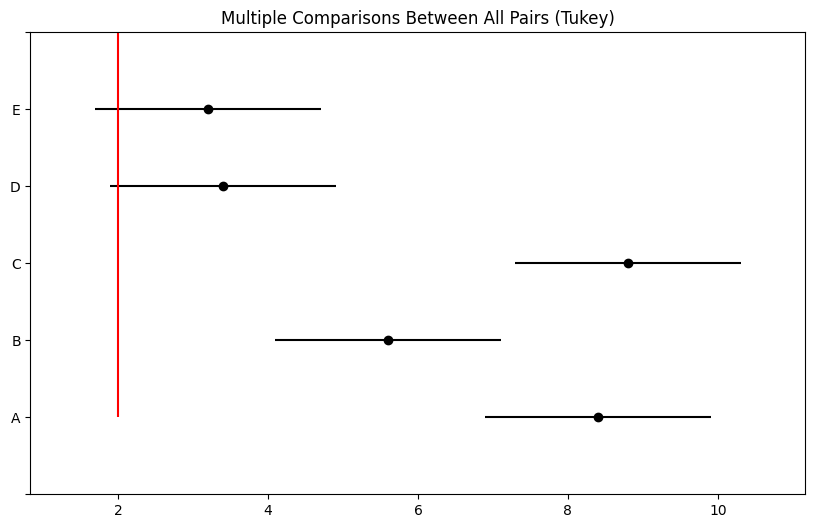

In [23]:
### **a. Comparaciones Múltiples**
tukey = pairwise_tukeyhsd(endog=DCL["Tiempo"],     # Data
                          groups=DCL["Catalizador"],   # Groups
                          alpha=0.1)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=2,ymin=0,ymax=10, color="red")
tukey.summary()

### **a. Comparaciones Múltiples:DCL - AUTO - Usando Statgraphics**

### **b. Comparaciones Múltiples: DCL - Conductor - Usando Python y Statgraphics**

group1,group2,meandiff,p-adj,lower,upper,reject
Lote1,Lote2,1.0,0.9852,-4.1665,6.1665,False
Lote1,Lote3,0.6,0.9979,-4.5665,5.7665,False
Lote1,Lote4,2.0,0.8419,-3.1665,7.1665,False
Lote1,Lote5,-0.2,1.0,-5.3665,4.9665,False
Lote2,Lote3,-0.4,0.9996,-5.5665,4.7665,False
Lote2,Lote4,1.0,0.9852,-4.1665,6.1665,False
Lote2,Lote5,-1.2,0.9712,-6.3665,3.9665,False
Lote3,Lote4,1.4,0.9504,-3.7665,6.5665,False
Lote3,Lote5,-0.8,0.9936,-5.9665,4.3665,False
Lote4,Lote5,-2.2,0.7916,-7.3665,2.9665,False


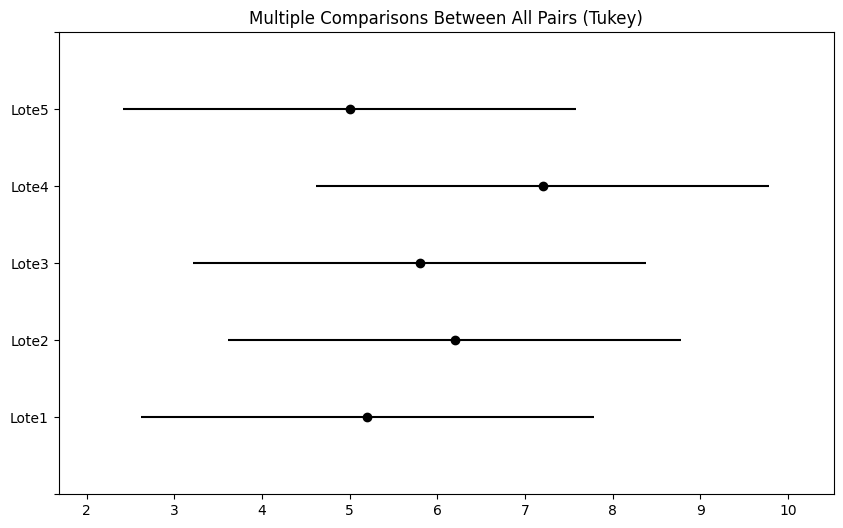

In [24]:
### **b. Comparaciones Múltiples**
tukey = pairwise_tukeyhsd(endog=DCL["Tiempo"],     # Data
                          groups=DCL["Lote"],   # Groups
                          alpha=0.1)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

### **c. Comparaciones Múltiples: DCL - Dia - Usando Pytho y Statgraphics**

group1,group2,meandiff,p-adj,lower,upper,reject
Dia1,Dia2,-1.0,0.9857,-6.9004,4.9004,False
Dia1,Dia3,-1.2,0.9721,-7.1004,4.7004,False
Dia1,Dia4,-1.6,0.924,-7.5004,4.3004,False
Dia1,Dia5,0.2,1.0,-5.7004,6.1004,False
Dia2,Dia3,-0.2,1.0,-6.1004,5.7004,False
Dia2,Dia4,-0.6,0.998,-6.5004,5.3004,False
Dia2,Dia5,1.2,0.9721,-4.7004,7.1004,False
Dia3,Dia4,-0.4,0.9996,-6.3004,5.5004,False
Dia3,Dia5,1.4,0.9518,-4.5004,7.3004,False
Dia4,Dia5,1.8,0.8886,-4.1004,7.7004,False


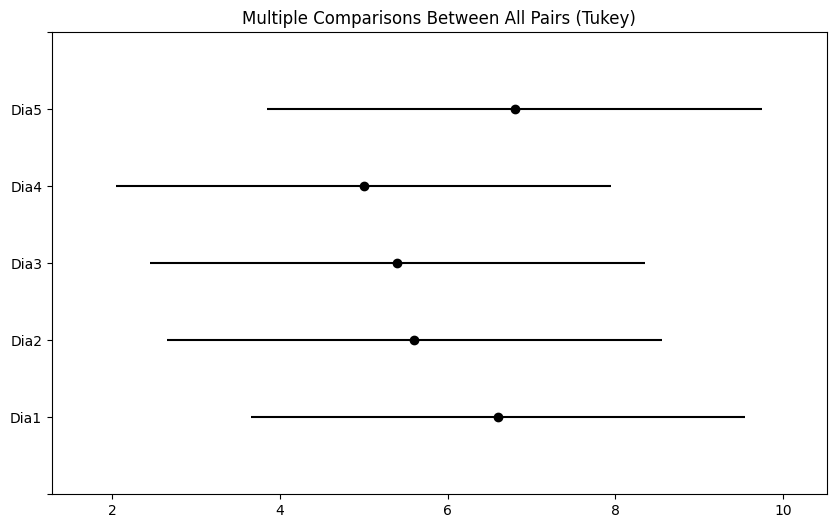

In [25]:
### **c. Comparaciones Múltiples**
tukey = pairwise_tukeyhsd(endog=DCL["Tiempo"],     # Data
                          groups=DCL["Dia"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

### **c. Comparaciones Múltiples: DCL - Turno - Usando Pytho y Statgraphics**

## **4.10 Supuestos del Modelo**
# **a. Forma 1. Shapiro Wilks**

In [26]:
# **a. Forma 1. Shapiro Wilks**
statistic, pvalue = stats.shapiro(modeloDCL.resid)
print(f'El valor critico Shapiro wilks es {round(statistic,3)} y el valor p = {round(pvalue,1)*100} >0.05')

El valor critico Shapiro wilks es 0.966 y el valor p = 50.0 >0.05


# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**

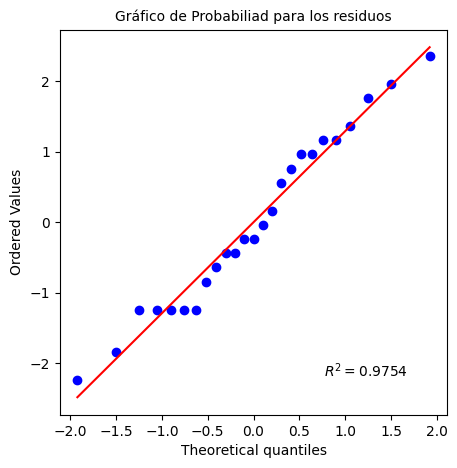

In [27]:
# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(modeloDCL.resid, plot= plt, rvalue= True)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

# **c. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**

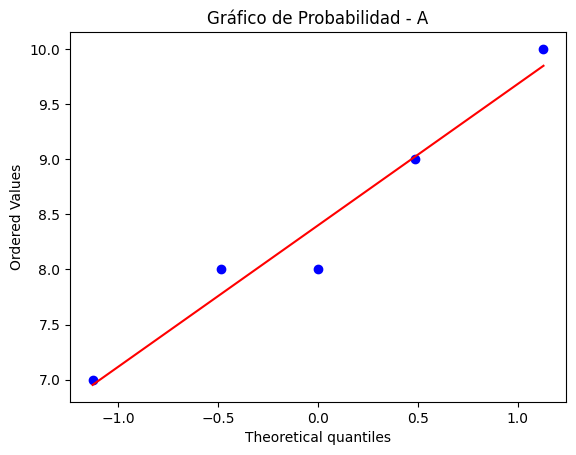

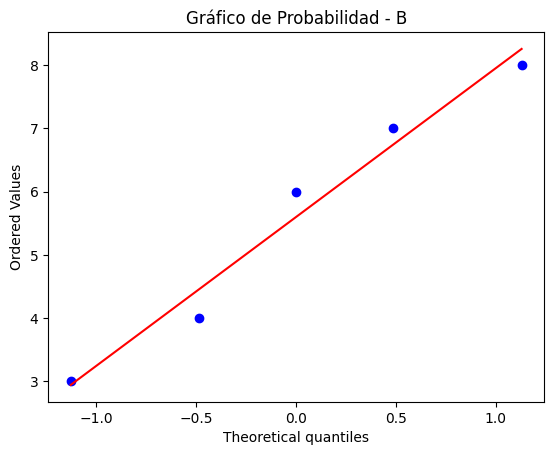

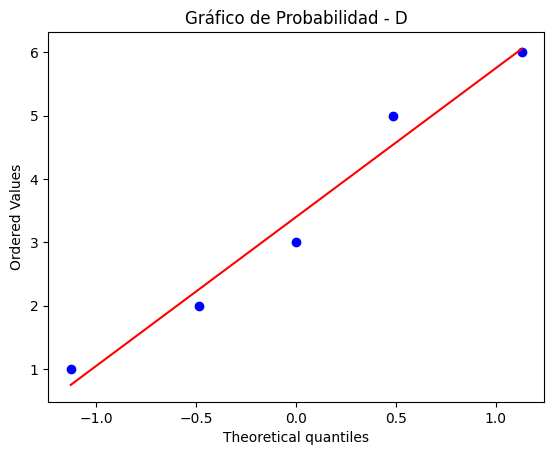

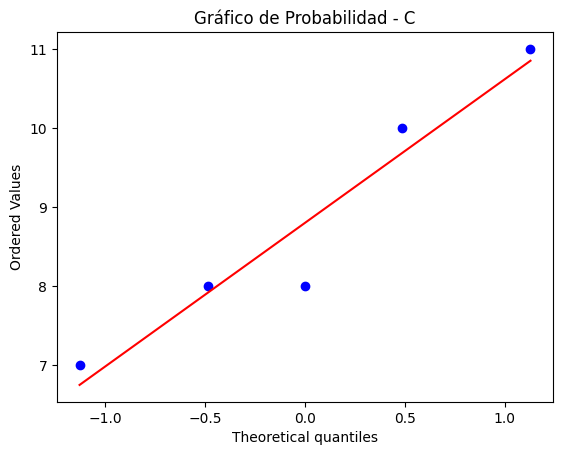

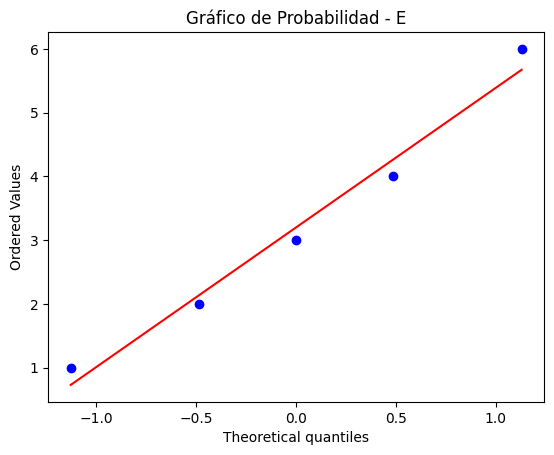

In [28]:
# **c. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma: Por VITAMINAS**
unique_catalizador = DCL['Catalizador'].unique()
for catalizador in unique_catalizador:
    stats.probplot(DCL[DCL['Catalizador'] == catalizador]['Tiempo'], dist="norm", plot=plt)
    plt.title("Gráfico de Probabilidad - "+catalizador)
    plt.show()

## **d. Histograma + curva normal teórica**

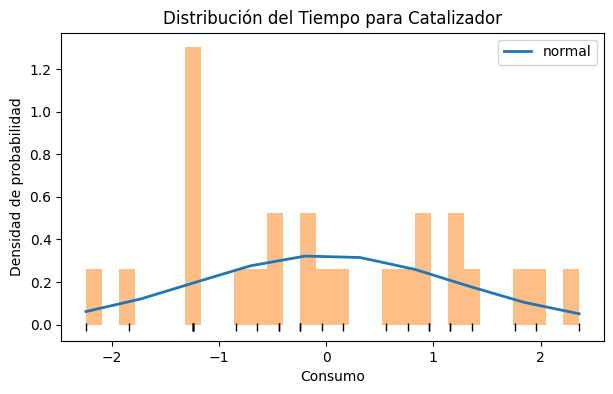

In [29]:
## **d. Histograma + curva normal teórica**
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
tgp2 = modeloDCL.resid
mu, sigma = stats.norm.fit(tgp2)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(tgp2), max(tgp2), num=10)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=tgp2, density=True, bins=30,  alpha=0.5)
ax.plot(tgp2, np.full_like(tgp2, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución del Tiempo para Catalizador')
ax.set_xlabel('Consumo')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

## **e. Homocedasticidad de los residuos: Usando la prueba de Levene**

In [30]:
## **1.17 Homocedasticidad - Prueba de Levene**
res = st()
res.levene(df=DCL, res_var='Tiempo', xfac_var='Catalizador')
table_leve = res.levene_summary
# output

print(f'El valor critico Levene es {round(table_leve.Value[0],3)} y el valor p = {round(table_leve.Value[2],1)*100}% > 5%')


El valor critico Levene es 0.444 y el valor p = 80.0% > 5%


In [31]:
## **1.17 Homocedasticidad - Prueba de Levene**
res = st()
res.levene(df=DCL, res_var='Tiempo', xfac_var='Dia')
table_leve = res.levene_summary
# output

print(f'El valor critico Levene es {round(table_leve.Value[0],3)} y el valor p = {round(table_leve.Value[2],1)*100}% > 5%')


El valor critico Levene es 0.086 y el valor p = 100.0% > 5%


In [32]:
## **1.17 Homocedasticidad - Prueba de Levene**
res = st()
res.levene(df=DCL, res_var='Tiempo', xfac_var='Lote')
table_leve = res.levene_summary
# output

print(f'El valor critico Levene es {round(table_leve.Value[0],3)} y el valor p = {round(table_leve.Value[2],1)*100}% > 5%')


El valor critico Levene es 0.465 y el valor p = 80.0% > 5%


In [33]:
## **1.15 Homocedasticidad - Prueba de Bartlett: Otra forma**
res = st()
res.bartlett(df=DCL, res_var='Tiempo', xfac_var='Catalizador')
Barlet_t = res.bartlett_summary


print(f'El valor critico Levene es {round(Barlet_t.Value[0],3)} y el valor p = {round(Barlet_t.Value[2],1)*100}% > 5%')


El valor critico Levene es 1.554 y el valor p = 80.0% > 5%


In [34]:

## **1.15 Homocedasticidad - Prueba de Bartlett: Otra forma**
res = st()
res.bartlett(df=DCL, res_var='Tiempo', xfac_var='Dia')
Barlet_t = res.bartlett_summary


print(f'El valor critico Levene es {round(Barlet_t.Value[0],3)} y el valor p = {round(Barlet_t.Value[2],1)*100}% > 5%')


El valor critico Levene es 0.293 y el valor p = 100.0% > 5%


In [35]:
## **1.15 Homocedasticidad - Prueba de Bartlett: Otra forma**
res = st()
res.bartlett(df=DCL, res_var='Tiempo', xfac_var='Lote')
Barlet_t = res.bartlett_summary


print(f'El valor critico Levene es {round(Barlet_t.Value[0],3)} y el valor p = {round(Barlet_t.Value[2],1)*100}% > 5%')


El valor critico Levene es 2.15 y el valor p = 70.0% > 5%
